In [1]:
import zipfile
import io
import requests

# data handling
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize



# feature selection
from sklearn.feature_selection import mutual_info_classif

# classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# performance metrics
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [2]:
# URL of the zip file on GitHub
file_url = "https://github.com/albertegi/Cancer-Classification/blob/main/cancer_gene_expression.zip?raw=true"

# Step 1: Download the zip file
response = requests.get(file_url)
response.raise_for_status()  # Ensure the download was successful

# Step 2: Open the zip file in memory
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    # List files in the zip
    print(z.namelist())
    #extract and read it the csv file directly
    with z.open('cancer_gene_expression.csv') as f:
        dataframe = pd.read_csv(f)

# Now `dataframe` should contain the data from the CSV file
print(dataframe.head())

['cancer_gene_expression.csv']
   gene_1  gene_2  gene_3    gene_4  gene_5  gene_6  gene_7  gene_8    gene_9  \
0     0.0     0.0     0.0  2.088413     0.0     0.0     0.0     0.0  0.550605   
1     0.0     0.0     0.0  3.205955     0.0     0.0     0.0     0.0  0.425244   
2     0.0     0.0     0.0  4.746646     0.0     0.0     0.0     0.0  2.639417   
3     0.0     0.0     0.0  1.173191     0.0     0.0     0.0     0.0  1.527371   
4     0.0     0.0     0.0  1.366532     0.0     0.0     0.0     0.0  0.000000   

    gene_10  ...  gene_7992  gene_7993  gene_7994  gene_7995  gene_7996  \
0  2.815760  ...  11.558803   8.881802   6.014840   6.643534  11.740624   
1  2.354396  ...  11.062829   9.032864   5.054193   6.432320  12.104985   
2  1.657091  ...  12.497640   7.198160   0.943434   7.371690  11.202356   
3  2.732899  ...  11.261713   8.725676   6.300418   6.036451  11.732303   
4  3.388355  ...  12.241965   7.685204   5.142948   6.355788  11.493950   

   gene_7997  gene_7998  gene_7

# Data Exploration & Cleaning

In [3]:
# Check the number of features and samples in the dataset
# The last column contains the target variable
print(dataframe.shape)

(801, 8001)


In [4]:
# Check the first five columns in the dataset
print(dataframe.columns[0:5])

Index(['gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5'], dtype='object')


In [5]:
# Check the name of the last column
dataframe.columns[-1]

'Cancer_Type'

In [6]:
#Check for missing values

data_null_values = dataframe.isnull().sum()
null_values = [data_null_value for data_null_value in data_null_values if data_null_value > 0]
print('Colums with missing values:%d'%len(null_values))




Colums with missing values:0


<Axes: ylabel='count'>

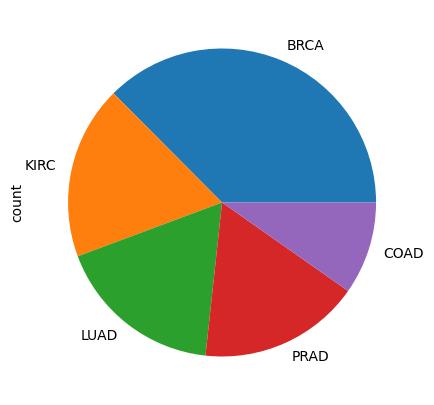

In [7]:
# plot a pie chat chat to display the class distribution

dataframe['Cancer_Type'].value_counts().plot(kind='pie', figsize=(10, 5))

In [8]:
# plot a bar chat chat to display the class distribution

dataframe['Cancer_Type'].value_counts().plot.bar

<bound method PlotAccessor.bar of <pandas.plotting._core.PlotAccessor object at 0x11049a1b0>>

## Cancer Types
### BRCA - Breast Cancer
### KIRC - Kidney
### LUAD - Lung Cancer
### PRAD - Prostrate Cancer
### COAD - Colon Cancer

# Data preprocessing
### This is to process the data in a suitable format before modelling 

In [9]:
# separate the features from the target variable.

X = dataframe.iloc[:, 0:-1]
y = dataframe.iloc[:,-1]

In [10]:
X.shape

(801, 8000)

In [11]:
y.shape

(801,)

# Encode Labels

### The target variable is categorical, and therefore need to be converted to numberic form.

In [12]:
# Encode the target variables (y) with values between 0 and n_classes-1.
# Use the LabelEncoder class

label_encoder = LabelEncoder()
label_encoder.fit(y)
y_encoded = label_encoder.transform(y)
labels = label_encoder.classes_
classes = np.unique(y_encoded)

In [13]:
y_encoded

array([2, 2, 0, 2, 1, 3, 2, 3, 0, 1, 4, 0, 4, 4, 2, 4, 2, 3, 3, 4, 0, 1,
       0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 1, 2, 4, 0, 0, 0, 4, 0, 0, 1, 0,
       3, 2, 1, 1, 2, 0, 4, 1, 0, 3, 3, 0, 3, 0, 0, 4, 3, 4, 0, 4, 3, 0,
       1, 2, 2, 0, 1, 1, 0, 4, 2, 0, 4, 3, 1, 2, 2, 3, 2, 0, 0, 0, 4, 3,
       0, 3, 4, 2, 0, 0, 0, 2, 4, 2, 0, 4, 3, 3, 2, 0, 0, 4, 0, 0, 0, 0,
       0, 2, 3, 2, 0, 0, 0, 2, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 3, 0, 0, 2, 0, 3, 0, 1, 4, 1, 3, 1, 3, 0, 1, 0, 0, 0,
       2, 1, 1, 3, 3, 4, 3, 0, 3, 2, 0, 2, 0, 3, 0, 3, 2, 2, 3, 0, 0, 0,
       3, 2, 1, 3, 0, 0, 3, 0, 4, 4, 3, 1, 0, 0, 0, 4, 1, 0, 4, 0, 4, 1,
       0, 4, 2, 4, 4, 0, 3, 0, 3, 0, 0, 2, 2, 3, 2, 3, 4, 0, 2, 3, 3, 1,
       3, 0, 4, 3, 0, 1, 3, 2, 4, 0, 0, 4, 3, 2, 4, 0, 4, 2, 0, 2, 3, 0,
       3, 0, 2, 4, 0, 2, 4, 0, 0, 4, 3, 3, 0, 3, 0, 2, 0, 0, 0, 0, 4, 2,
       2, 4, 0, 3, 0, 0, 0, 4, 3, 0, 0, 2, 3, 2, 3, 4, 3, 1, 0, 0, 3, 2,
       0, 1, 0, 4, 3, 1, 3, 1, 2, 3, 2, 1, 0, 0, 3,

In [14]:
labels

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [15]:
classes

array([0, 1, 2, 3, 4])

## Data Splitting

### Split the dataset into training and test set. the training set is initially passed to the machine learning
### model. this is to enable the model to identify discriminatory patterns which can be used to make future
### predictions. The test data is used to evaluate the model after the training phase.


In [16]:
# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded, test_size=0.2, random_state=42)

## Data Normalization
### Data normalization is done so that the values are in the same range. This will improve model 
### performance and avoid bias


In [17]:
# Scale data between 0 and 1

min_max_scaler = MinMaxScaler()
X_train_norm = min_max_scaler.fit_transform(X_train)
X_test_norm = min_max_scaler.fit_transform(X_test)

## Feature Selection using Mutual Information
### The purpose of feature selection is to select relevant features for classification. feauture selection is usually used as preprocessing step before the actual learning.
### Mutual information algorithm is used to compute the relevance of each feature. the top n (eg.300)
## are selected for the machine learning analysis.

In [18]:
MI = mutual_info_classif(X_train_norm, y_train)

In [19]:
# Select top n features. lets say 300
# you can modify the value and see how the performance of the model changes.

n_features = 300
selected_scores_indices = np.argsort(MI)[::-1][0:n_features]

In [20]:
X_train_selected = X_train_norm[:,selected_scores_indices]
X_test_selected = X_test_norm[:,selected_scores_indices]

In [21]:
X_train_selected.shape

(640, 300)

In [22]:
X_test_selected.shape

(161, 300)

# Classification
### The random forest classifier is used for the mutlticlass and high dimensional data.
### classification will involve training the model and testing it.

# Model Training

### Training allows the machine learning model to learn from the data and use the identified patterns
### to predict the outcomes of data it has never seen before. In the training phase, the model is fed
### with the subset of training data.

In [23]:
# Random Forest Classifier
# because we are dealing with multiclass data, the one versus rest strategy is used.
# learn to predict each class against the other.

RF = OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
RF.fit(X_train_selected, y_train)
y_pred = RF.predict(X_test_selected)
pred_prob = RF.predict_proba(X_test_selected)

# Model Evaluation
### after training the model, it is important to know how the model performs on an independent data
### (i.e. test data). the following metrics are used to evaluate the model.
- accuracy
- precision
- recall
- f1 score
- confusion matrix
- ROC Curve

In [24]:
# accuracy
accuracy = np.round(balanced_accuracy_score(y_test, y_pred), 4)
print('accuracy:%0.4f'%accuracy)

#precision
precision = np.round(precision_score(y_test, y_pred, average = 'weighted'), 4)
print('precision:%0.4f'%precision)

# recall
recall = np.round(recall_score(y_test, y_pred, average = 'weighted'), 4)
print('recall:%0.4f'%recall)

# f1score
f1score = np.round(f1_score(y_test, y_pred, average = 'weighted'), 4)
print('recall:%0.4f'%f1score)

# report
# Checking model performance on individual classes
report = classification_report(y_test, y_pred, target_names=labels)
print('\n')
print('Classification report\n\n')
print(report)

accuracy:0.9625
precision:0.9755
recall:0.9752
recall:0.9747


Classification report


              precision    recall  f1-score   support

        BRCA       0.95      1.00      0.98        60
        COAD       1.00      0.94      0.97        16
        KIRC       1.00      1.00      1.00        28
        LUAD       0.95      0.88      0.91        24
        PRAD       1.00      1.00      1.00        33

    accuracy                           0.98       161
   macro avg       0.98      0.96      0.97       161
weighted avg       0.98      0.98      0.97       161



In [25]:
# generate confusion matrix
# generate a table of correct classifications and misclassifications.
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

In [26]:
cm_df

,BRCA,COAD,KIRC,LUAD,PRAD
BRCA,60,0,0,0,0
COAD,0,15,0,1,0
KIRC,0,0,28,0,0
LUAD,3,0,0,21,0
PRAD,0,0,0,0,33


Text(50.722222222222214, 0.5, 'True Labels')

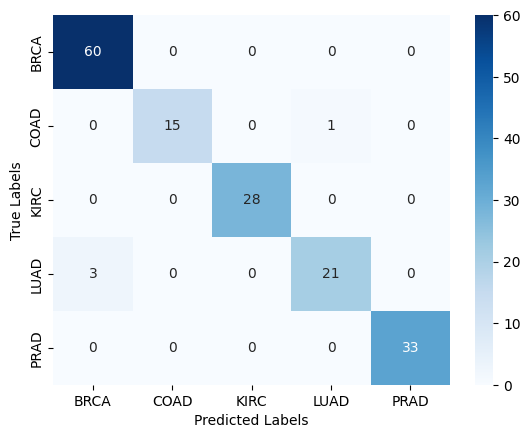

In [27]:
# visualize the confusion matrix using seaborn

sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

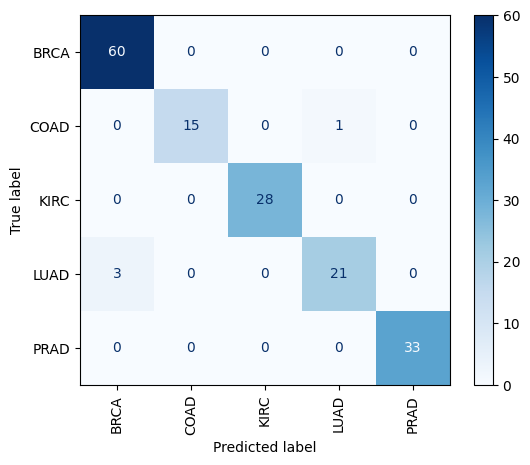

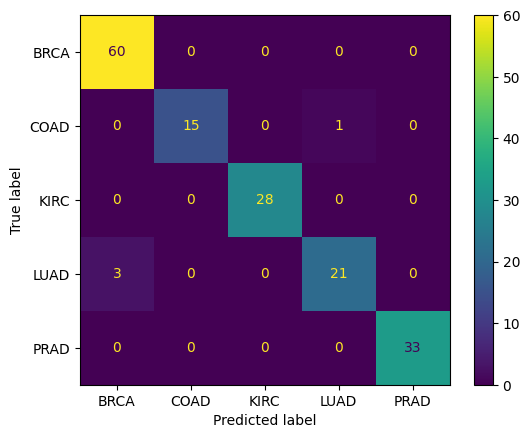

In [28]:
# visualize the confusion matrix directly

y_pred = RF.predict(X_test_selected)  # Generate predictions
disp = ConfusionMatrixDisplay.from_estimator(RF, X_test_selected, y_test,
                                             xticks_rotation='vertical',
                                             cmap='Blues', display_labels=labels)
disp.plot()  # Display the plot

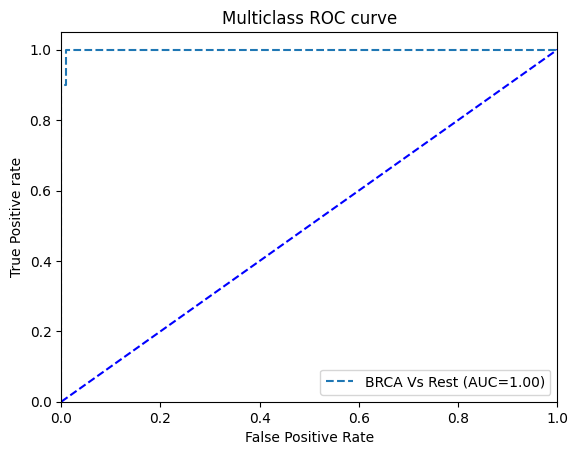

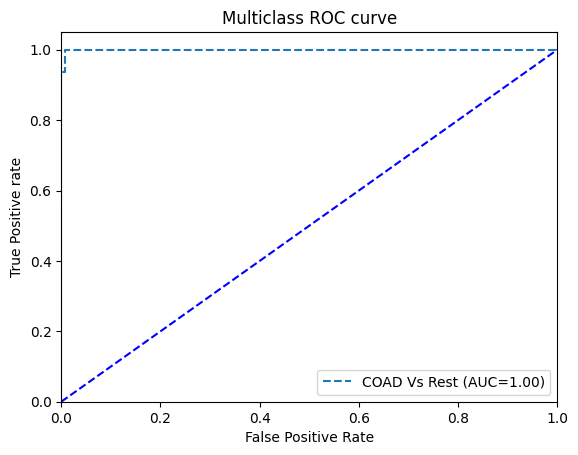

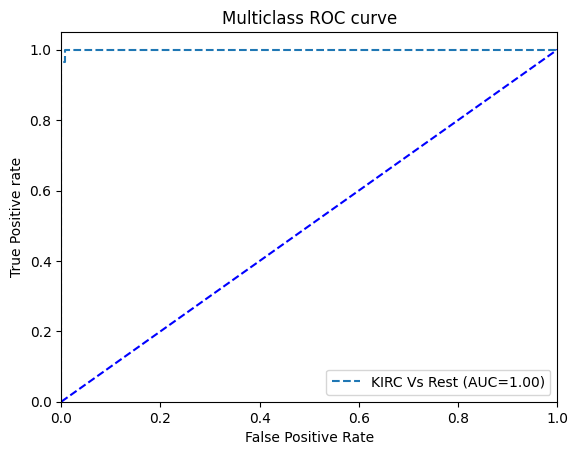

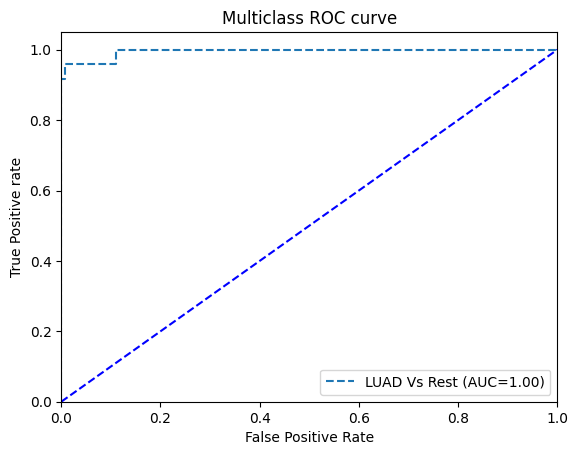

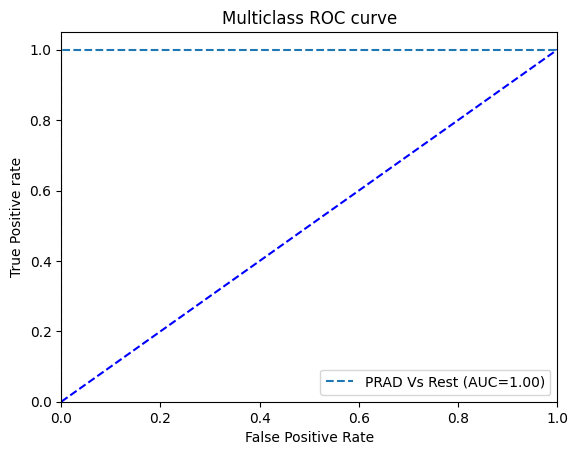

In [29]:
# roc curves are generated for each class
# y_test labels are therefore binarize because the probabilities (pred_prob) are calculated
# for each class. we therefore put the y_test in the same format as the pred_prob

y_test_binarized = label_binarize(y_test, classes=classes)

# roc curve for classes
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
            label = '%s Vs Rest (AUC=%0.2f)'%(labels[i],roc_auc[i]))
    plt.plot([0,1], [0, 1], 'b--')
    plt.xlim([0,1])
    plt.ylim([0, 1.05])
    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='lower right')
    plt.show()

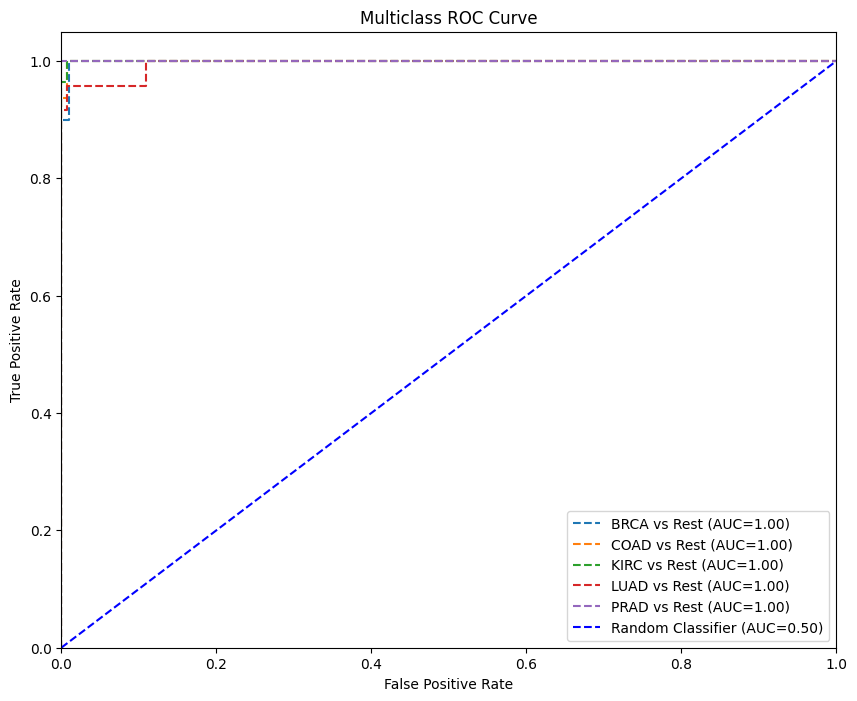

In [30]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize the test labels so that probabilities can be calculated for each class
y_test_binarized = label_binarize(y_test, classes=classes)

# Initialize dictionaries to store false positive rates, true positive rates, and AUC scores for each class
fpr = {}
tpr = {}
roc_auc = {}

# Generate ROC curve data for each class and store it
n_class = classes.shape[0]
for i in range(n_class):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves in one figure
plt.figure(figsize=(10, 8))
for i in range(n_class):
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label=f'{labels[i]} vs Rest (AUC={roc_auc[i]:.2f})')

# Plot the baseline ROC curve
plt.plot([0, 1], [0, 1], 'b--', label='Random Classifier (AUC=0.50)')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
